# 2023b_4DVARQG
This notebook, associated to the configuration file *config_2020a_4DVARQG.py* runs a BFN-QG experiment to map SSH from simulated SWOT and Nadir data

## Configuration file

In [1]:
path_config = 'config_2023b_4DVARSW'

In [2]:
import sys
sys.path.append('..')

In [3]:

from src import exp
config = exp.Exp(path_config)

name_experiment: 2023b_4DVARSW
saveoutputs: True
name_exp_save: 2023b_4DVARSW
path_save: outputs/2023b_4DVARSW
tmp_DA_path: scratch/2023b_4DVARSW
init_date: 2012-05-01 00:00:00
final_date: 2012-05-10 00:00:00
assimilation_time_step: 3:00:00
saveoutput_time_step: 3:00:00
flag_plot: 1
write_obs: True
path_obs: obs
compute_obs: False
name_lon: lon
name_lat: lat
name_time: time
plot_time_step: 1 day, 0:00:00
time_obs_min: None
time_obs_max: None

NAME_BC is not set in the configuration file


## State

In [4]:
from src import state as state
State = state.State(config)

super: GRID_CAR
lon_min: 230.0
lon_max: 240
lat_min: 30.0
lat_max: 40
dx: 10.0
name_init_mask: data_2023b/dc_ref_eval/2023b_SSHmapping_HF_California_eval_2012-05-01.nc
name_var_mask: {'lon': 'longitude', 'lat': 'latitude', 'var': 'ssh'}



## Assimilation

super: INV_4DVAR
compute_test: True
path_init_4Dvar: None
restart_4Dvar: False
gtol: 0.001
maxiter: 200
opt_method: L-BFGS-B
save_minimization: True
path_save_control_vectors: None
timestep_checkpoint: 3:00:00
sigma_R: None
sigma_B: None
prec: True
prescribe_background: False
bkg_satellite: None
path_background: None
bkg_Kdiffus: 0.0
name_bkg_var: res
bkg_maxiter: 30
bkg_maxiter_inner: 10
largescale_error_ratio: 1
only_largescale: False
anomaly_from_bc: False

super: MOD_SW1L
name_var: {'U': 'u_it', 'V': 'v_it', 'SSH': 'ssh_it'}
name_init_var: []
dir_model: None
var_to_save: None
dtmodel: 600
time_scheme: rk4
bc_kind: 1d
w_waves: [0.00014376682471122976]
He_init: 0.7
He_data: None
Ntheta: 1
g: 9.81

Tangent test:
1E+00 1E+00
1E-01 5E-01
1E-02 6E-02
1E-03 6E-03
1E-04 6E-04
1E-05 6E-05
1E-06 6E-06
1E-07 6E-07
1E-08 9E-08
1E-09 5E-07
Adjoint test:
nan
Observation information will be saved in dict_obs_SWOT_ALG_C2_J3_S3A_S3B_20120501_20120510_229_240_30_40_10800.txt
Reading dict_obs_SWOT_AL

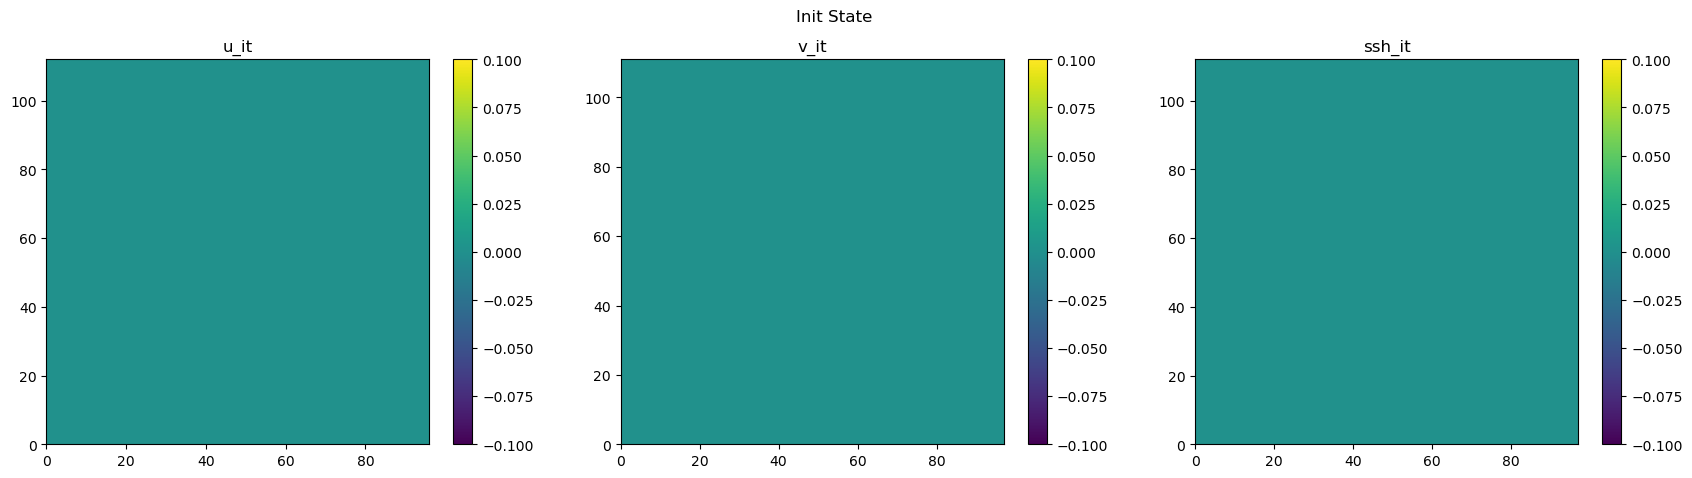

nHe: 1686
nbc: 2412
reduced order: 976156 --> 4098
 reduced factor: 238
Gradient test:


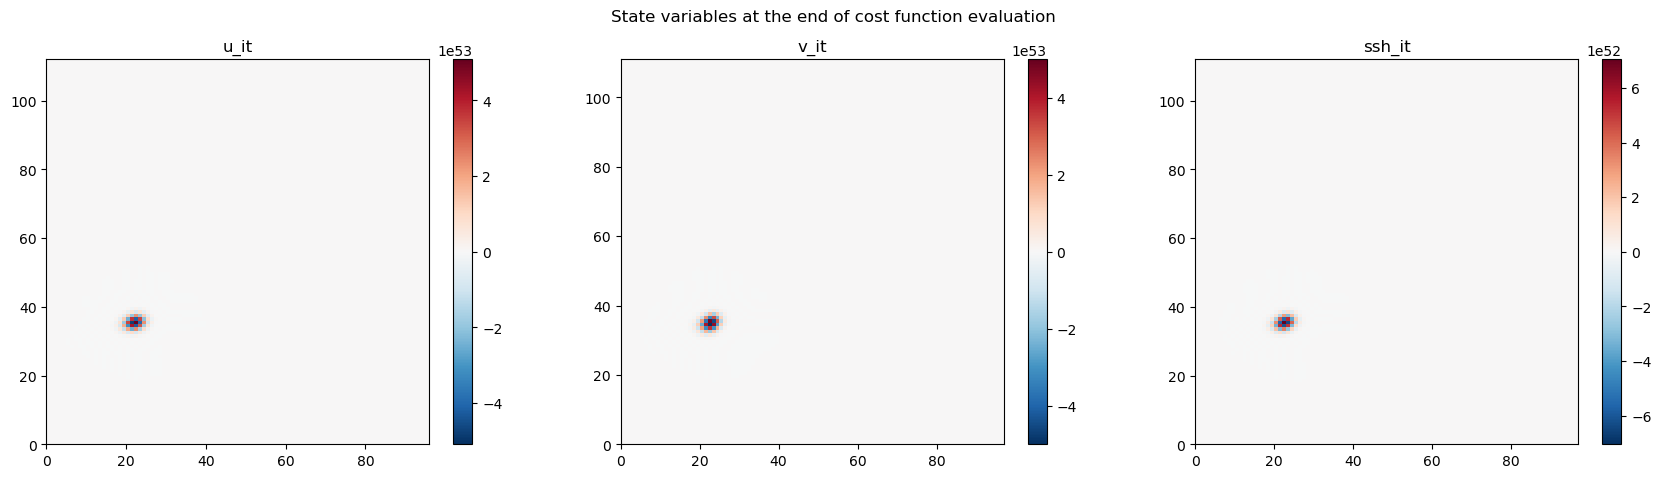

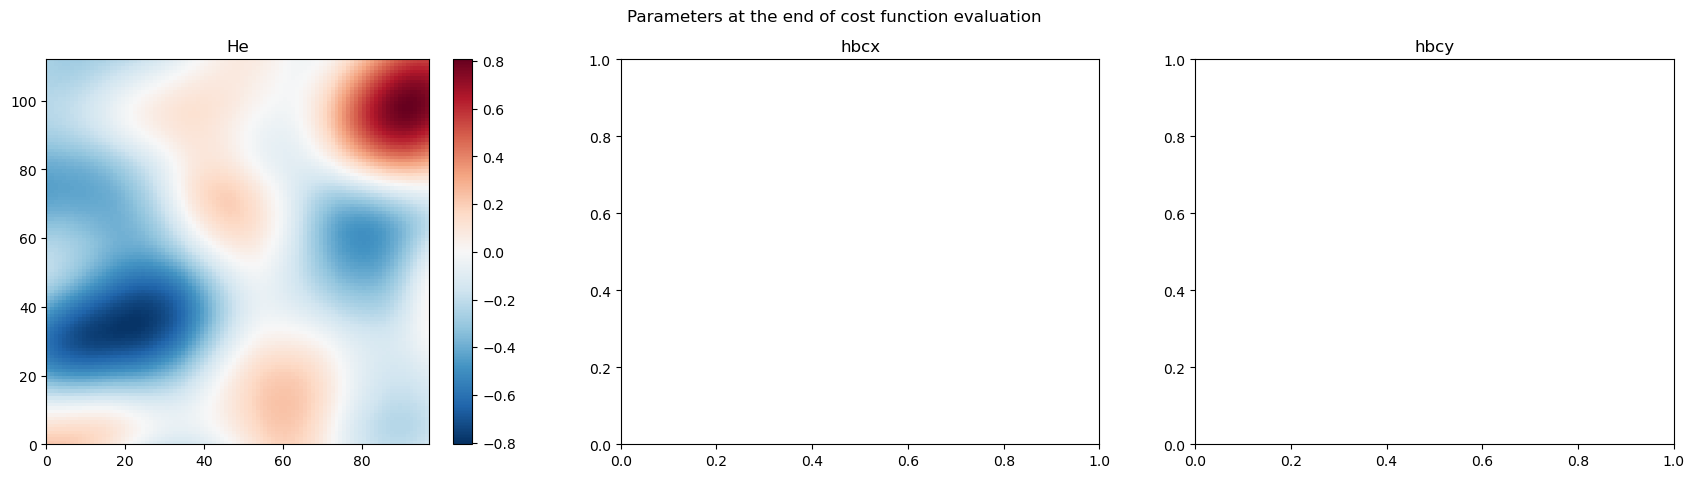

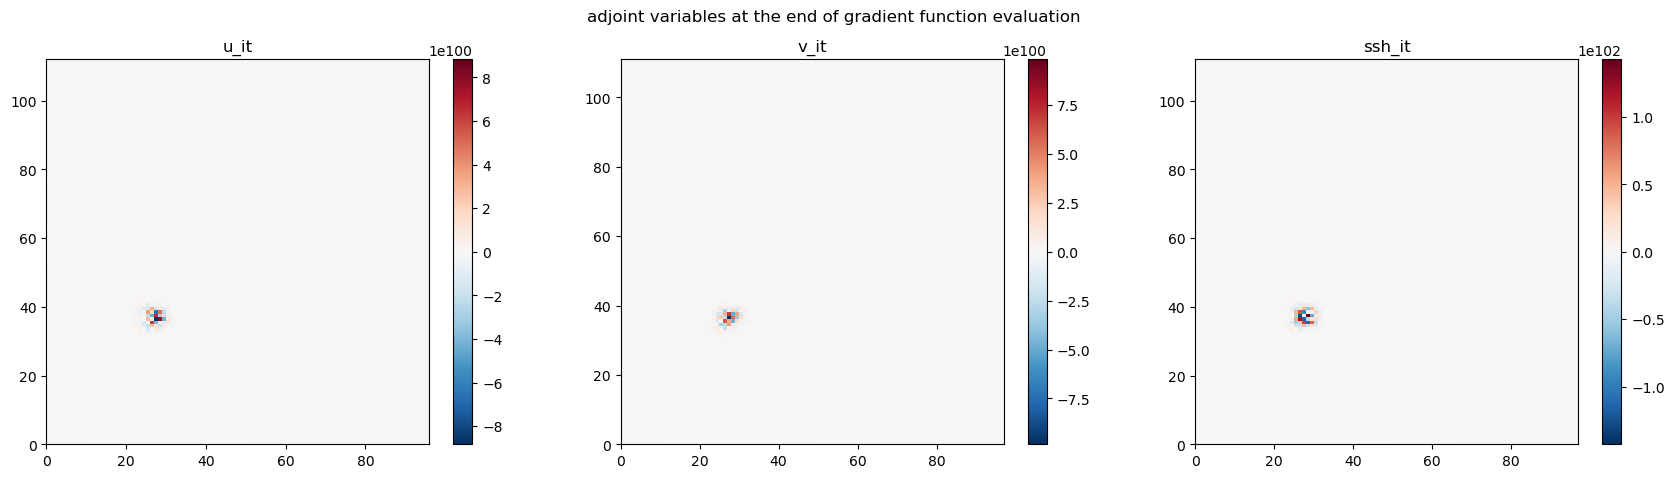

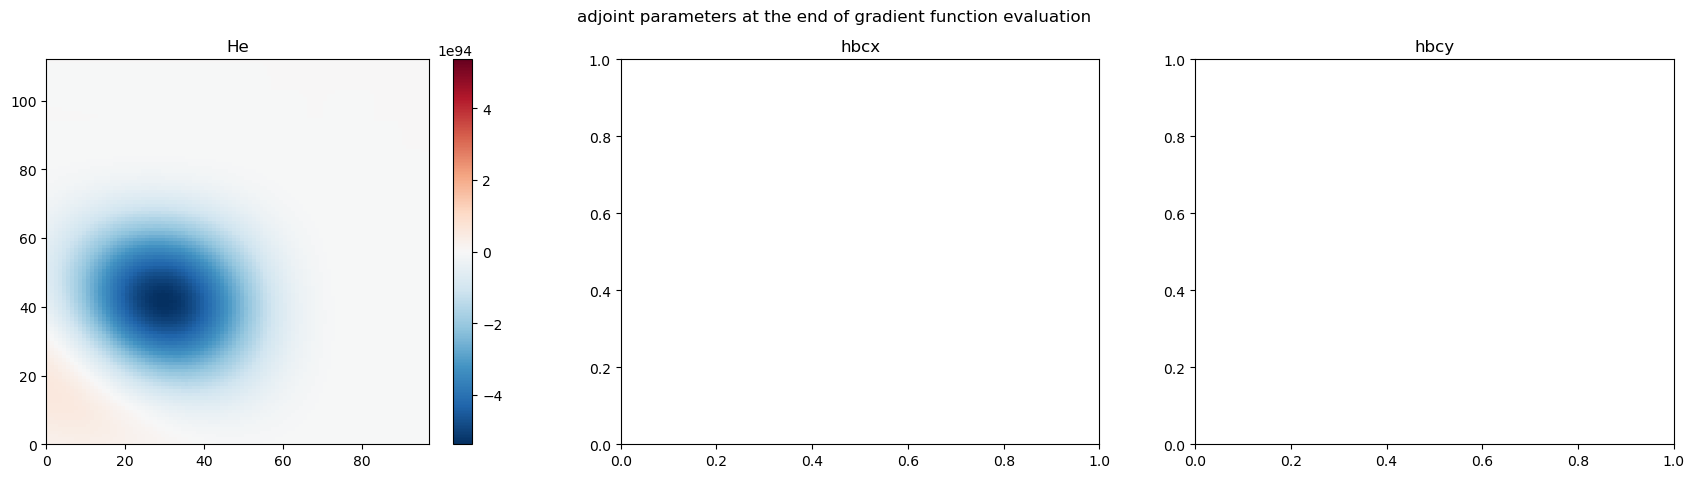

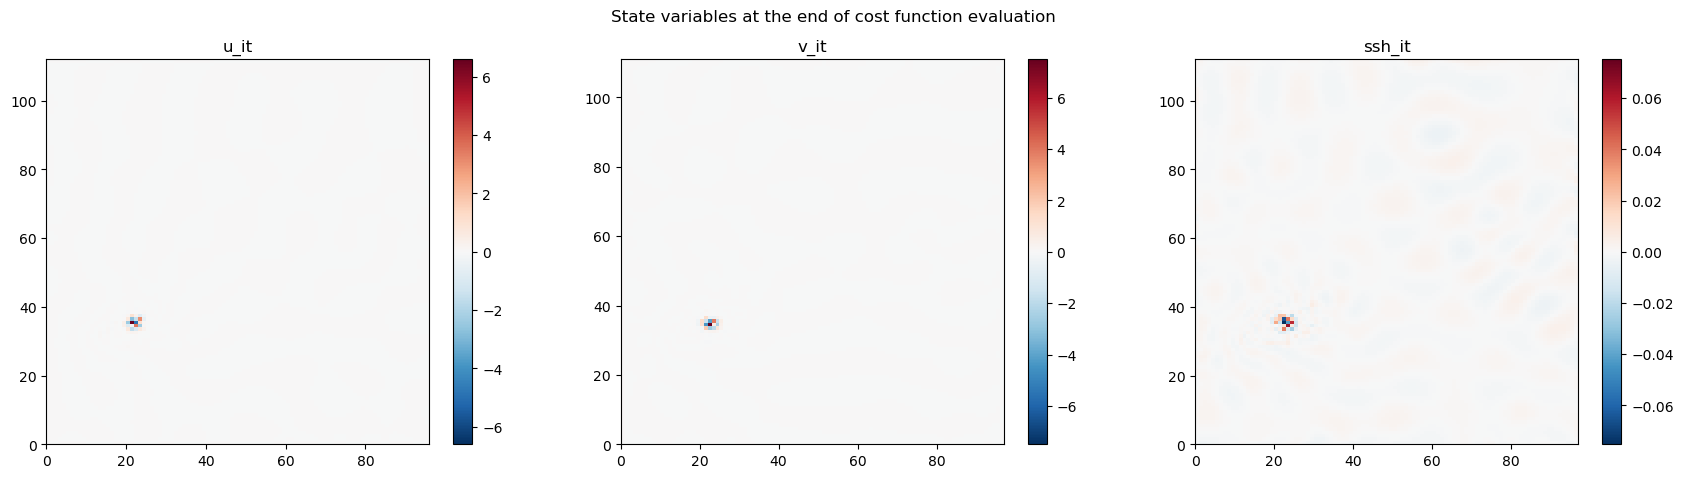

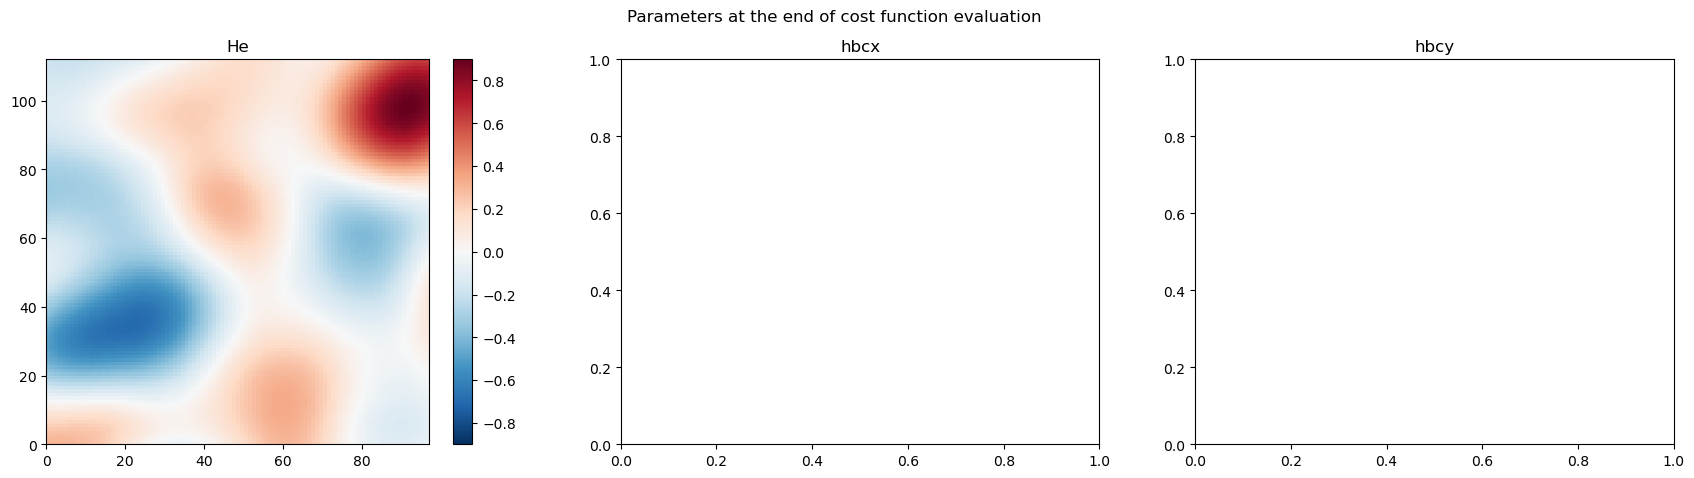

1.0E+00 , 9.84E-01


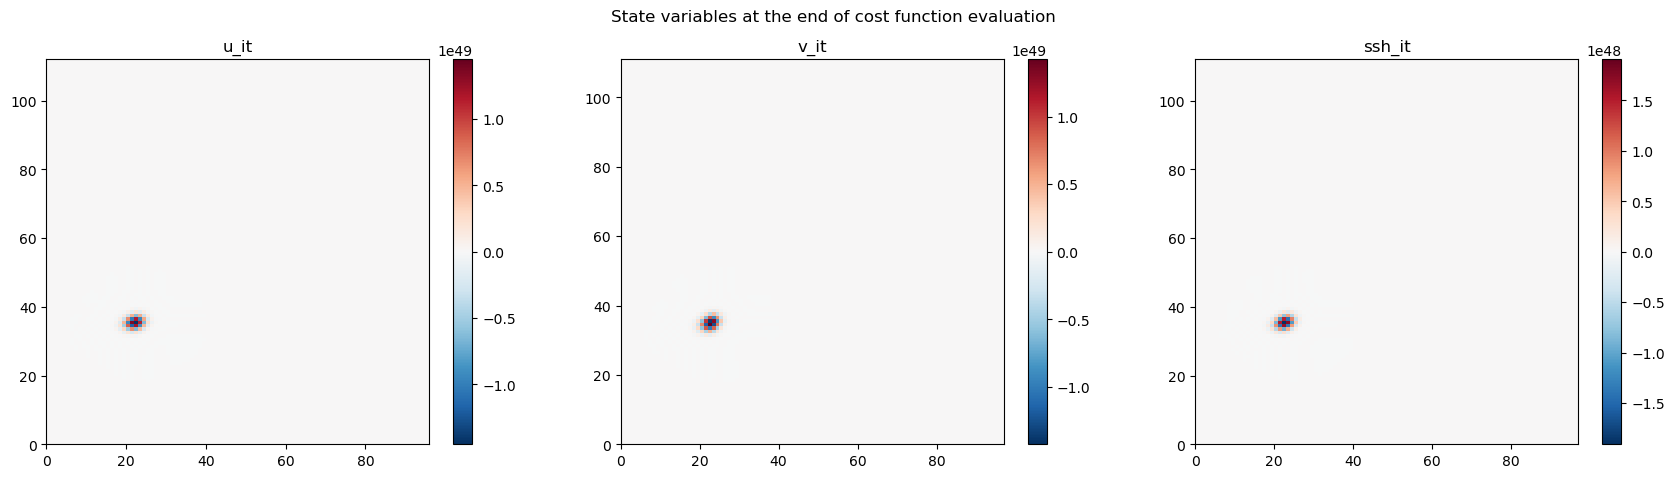

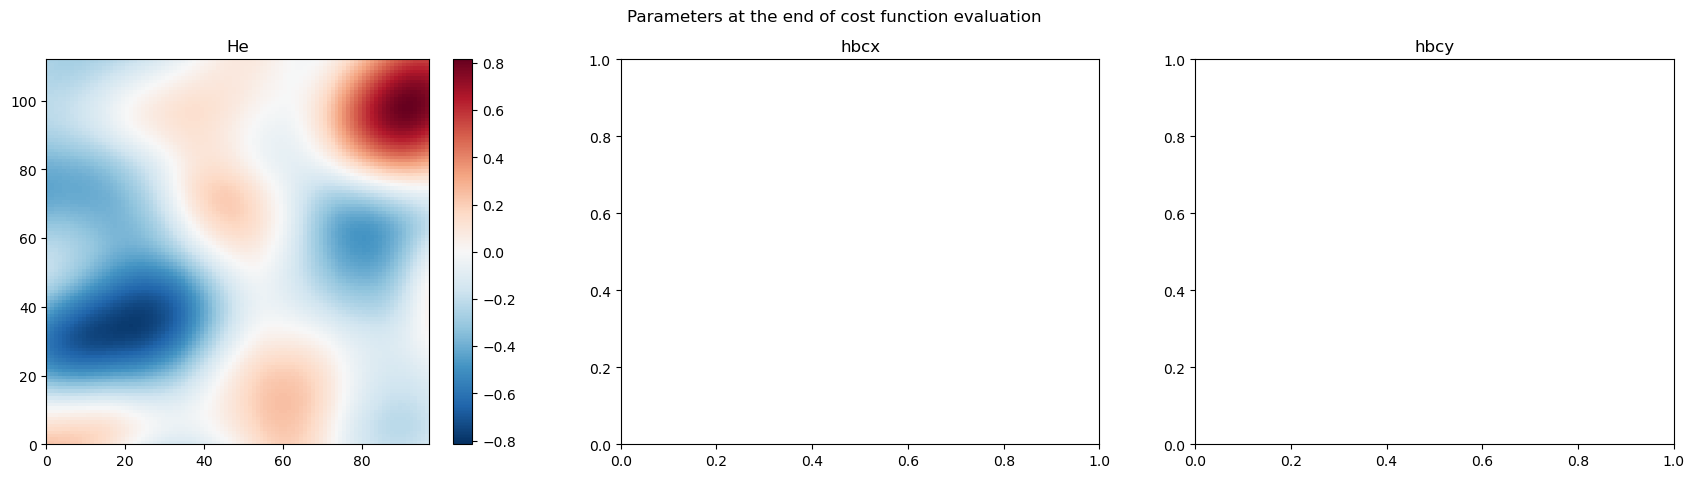

1.0E-01 , 8.37E-01


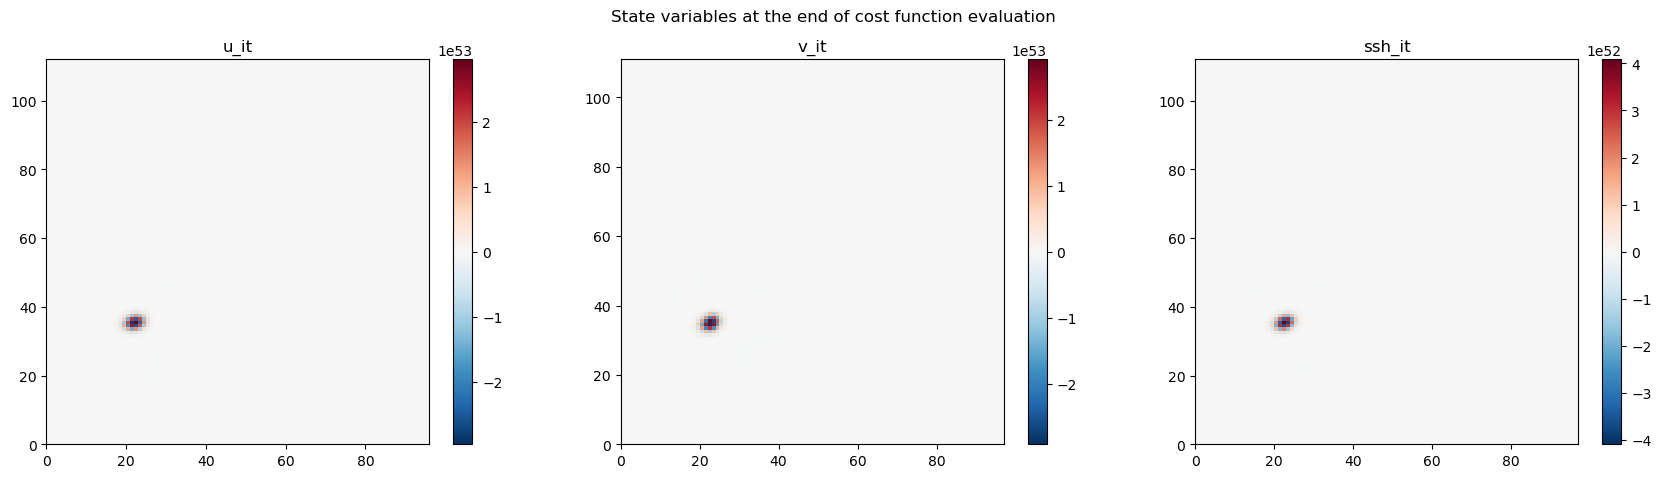

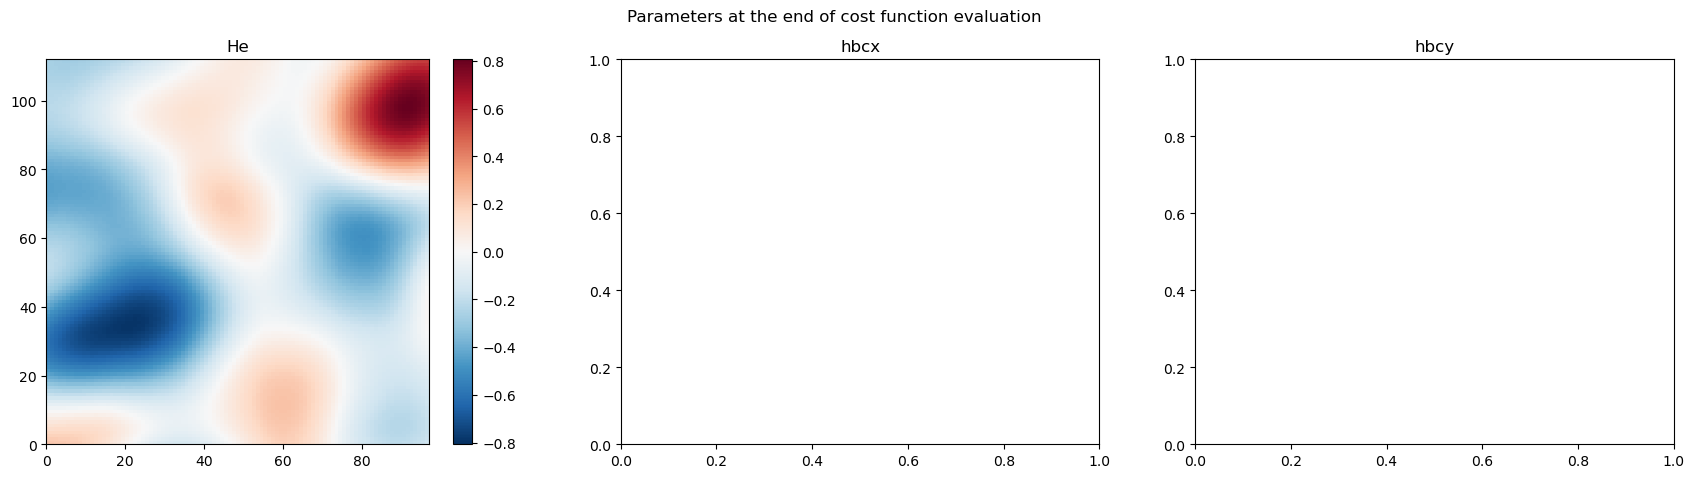

1.0E-02 , 4.95E-03


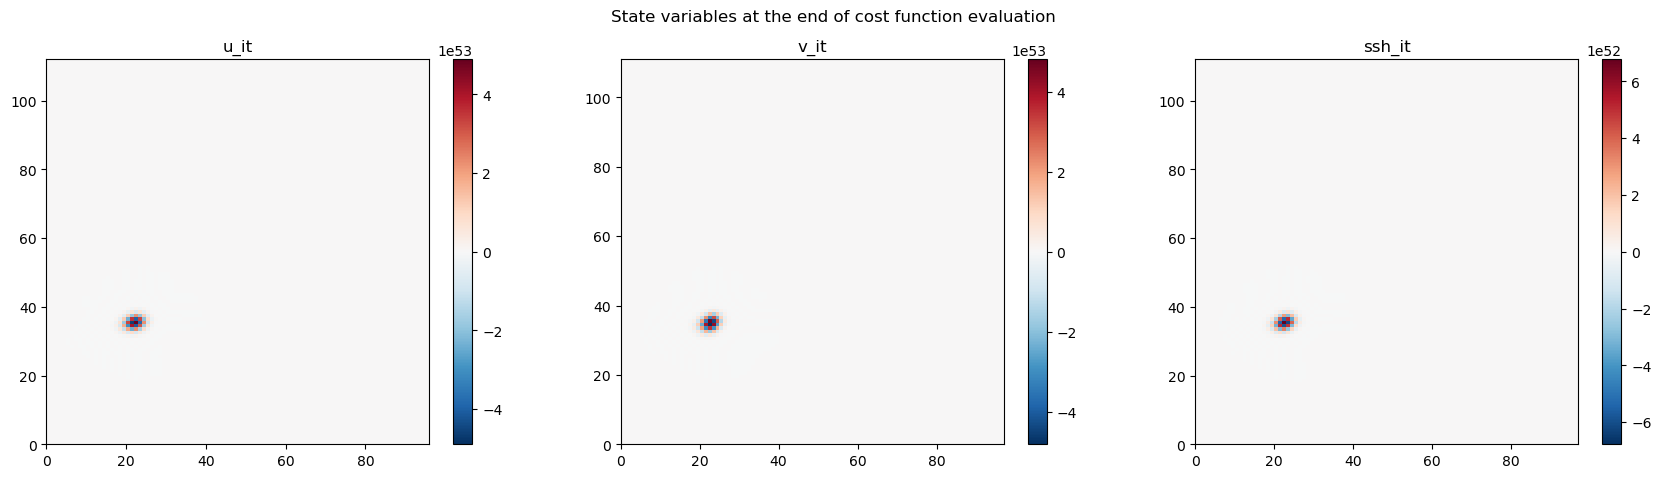

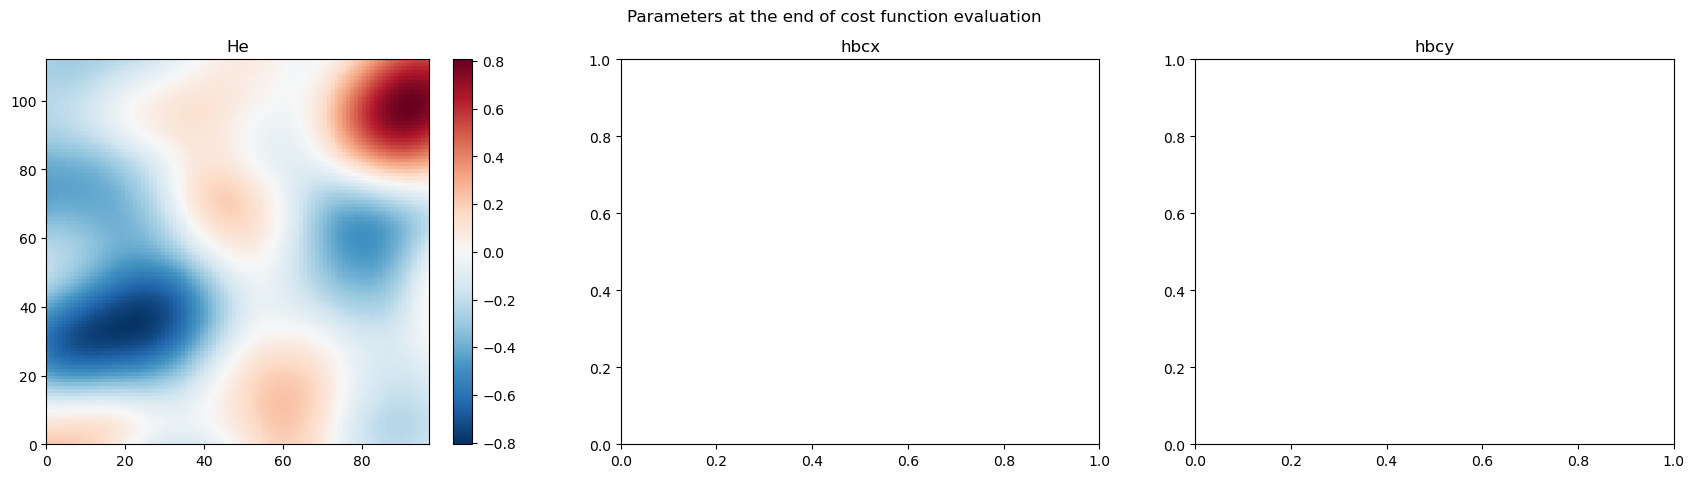

1.0E-03 , 3.96E-02


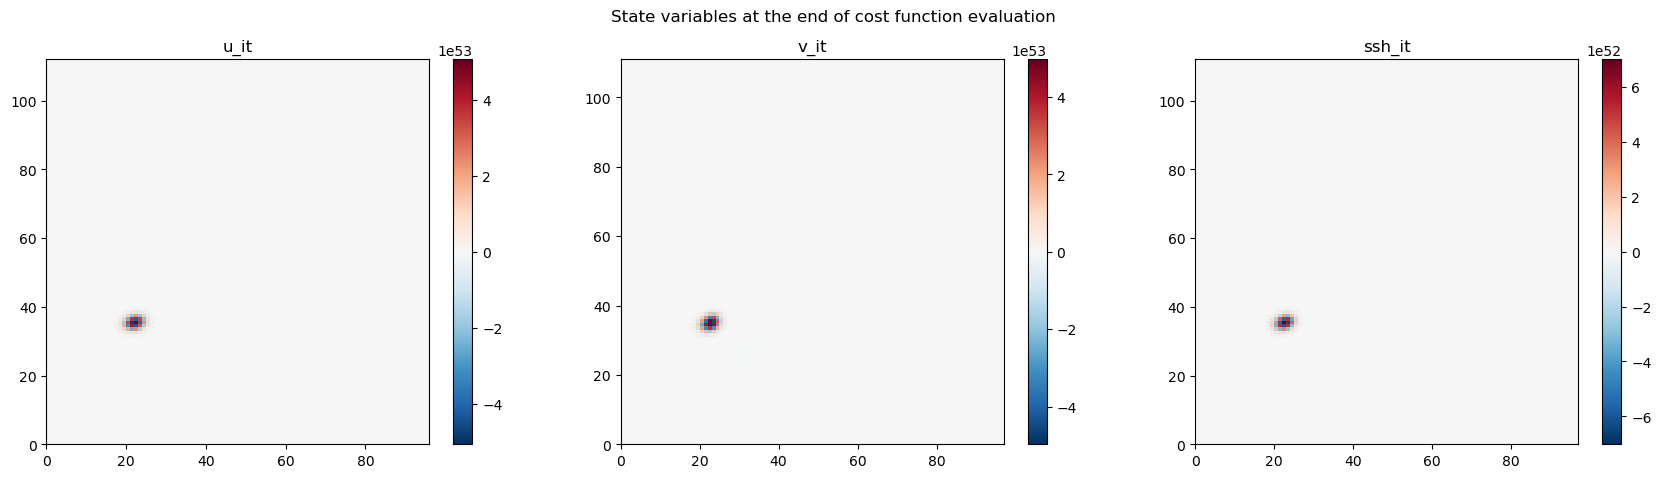

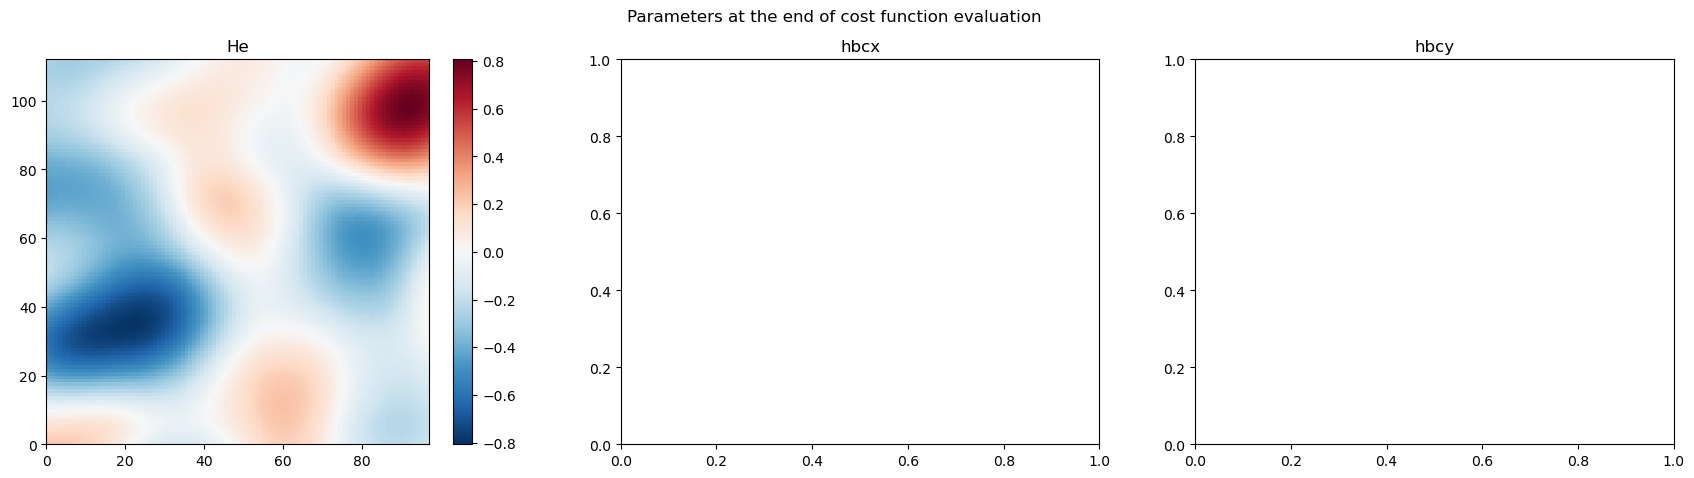

1.0E-04 , 4.58E-03


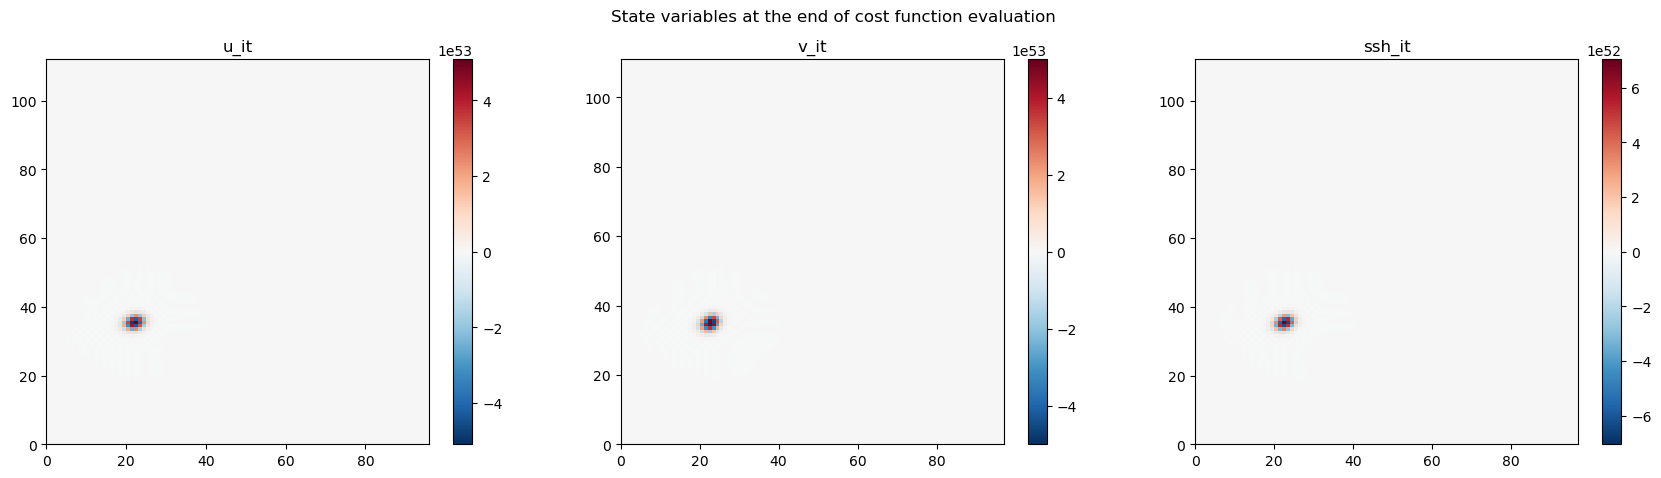

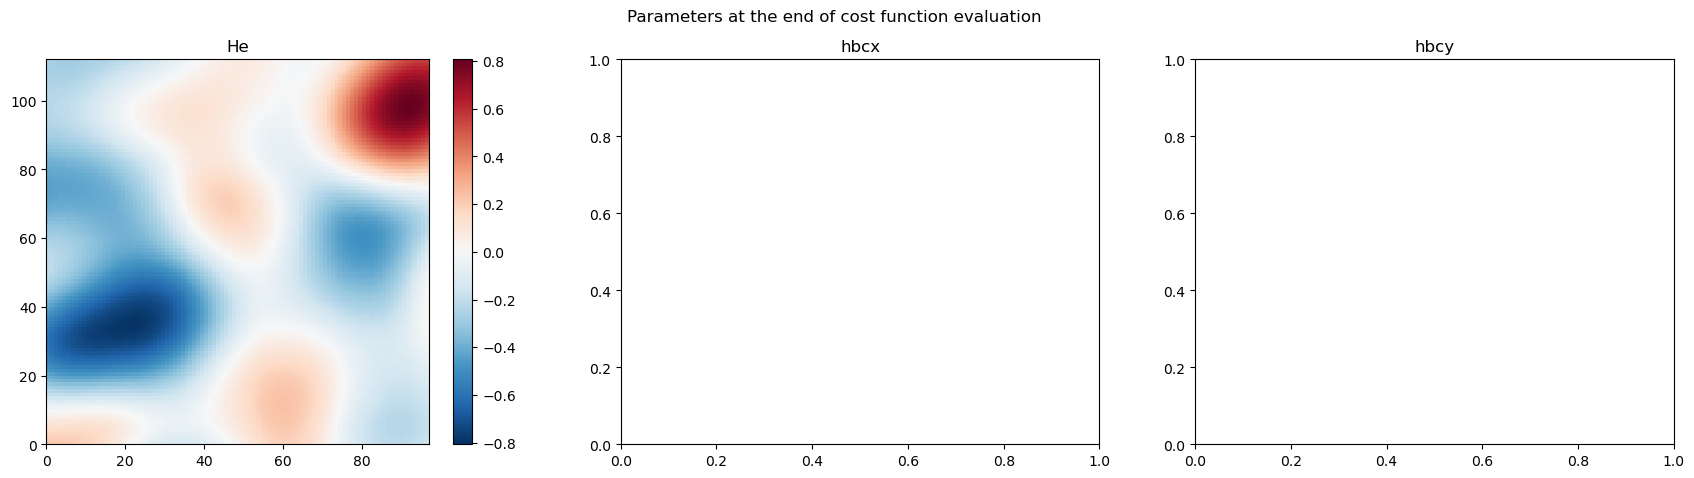

1.0E-05 , 4.64E-04


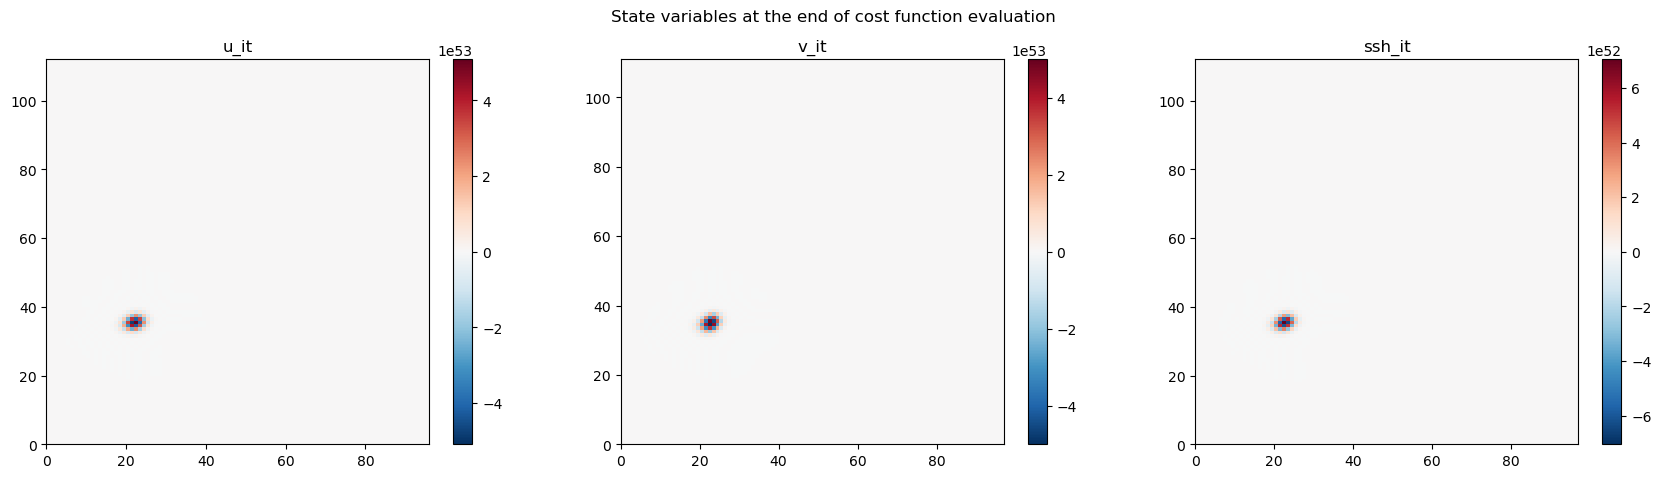

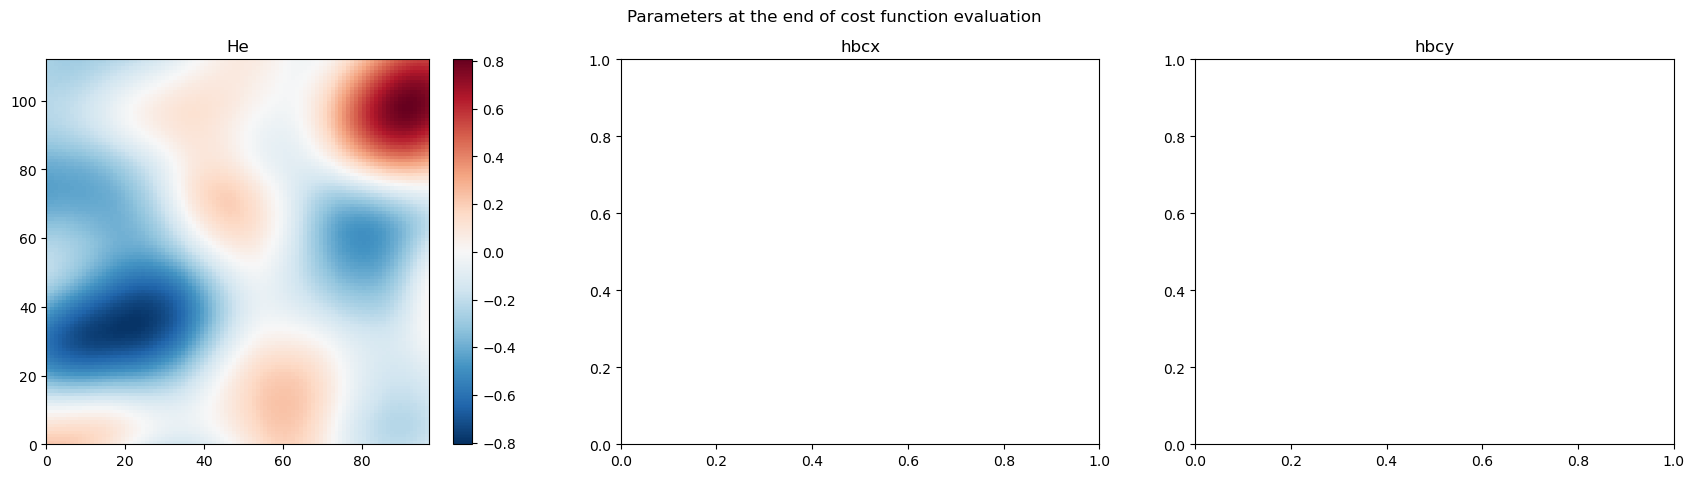

1.0E-06 , 4.65E-05


KeyboardInterrupt: 

In [5]:
from src import inv as inv
inv.Inv(config,State)

## Diagnostics

In [6]:
from src import diag as diag
Diag = diag.Diag(config,State)

super: DIAG_OSSE
dir_output: None
time_min: 2012-05-15 00:00:00
time_max: 2012-07-15 00:00:00
lon_min: None
lon_max: None
lat_min: None
lat_max: None
name_ref: data_2023b/dc_ref_eval/2023b_SSHmapping_HF_California_eval_*.nc
name_ref_time: time
name_ref_lon: longitude
name_ref_lat: latitude
name_ref_var: ssh
options_ref: {}
name_exp_var: SSH_tot
compare_to_baseline: True
name_bas: outputs/2023b_OI/2023b_OI*.nc
name_bas_time: time
name_bas_lon: lon
name_bas_lat: lat
name_bas_var: ssh
name_mask: None
name_var_mask: {'lon': '', 'lat': '', 'var': ''}


super: DIAG_OSSE
dir_output: None
time_min: 2012-05-15 00:00:00
time_max: 2012-07-15 00:00:00
lon_min: None
lon_max: None
lat_min: None
lat_max: None
name_ref: data_2023b/dc_ref_eval/2023b_SSHmapping_HF_California_eval_*.nc
name_ref_time: time
name_ref_lon: longitude
name_ref_lat: latitude
name_ref_var: ssh_bm
options_ref: {}
name_exp_var: ssh_bm
compare_to_baseline: True
name_bas: outputs/2023b_OI/2023b_OI*.nc
name_bas_time: time
name_bas_lo

In [7]:
Diag.regrid_exp()

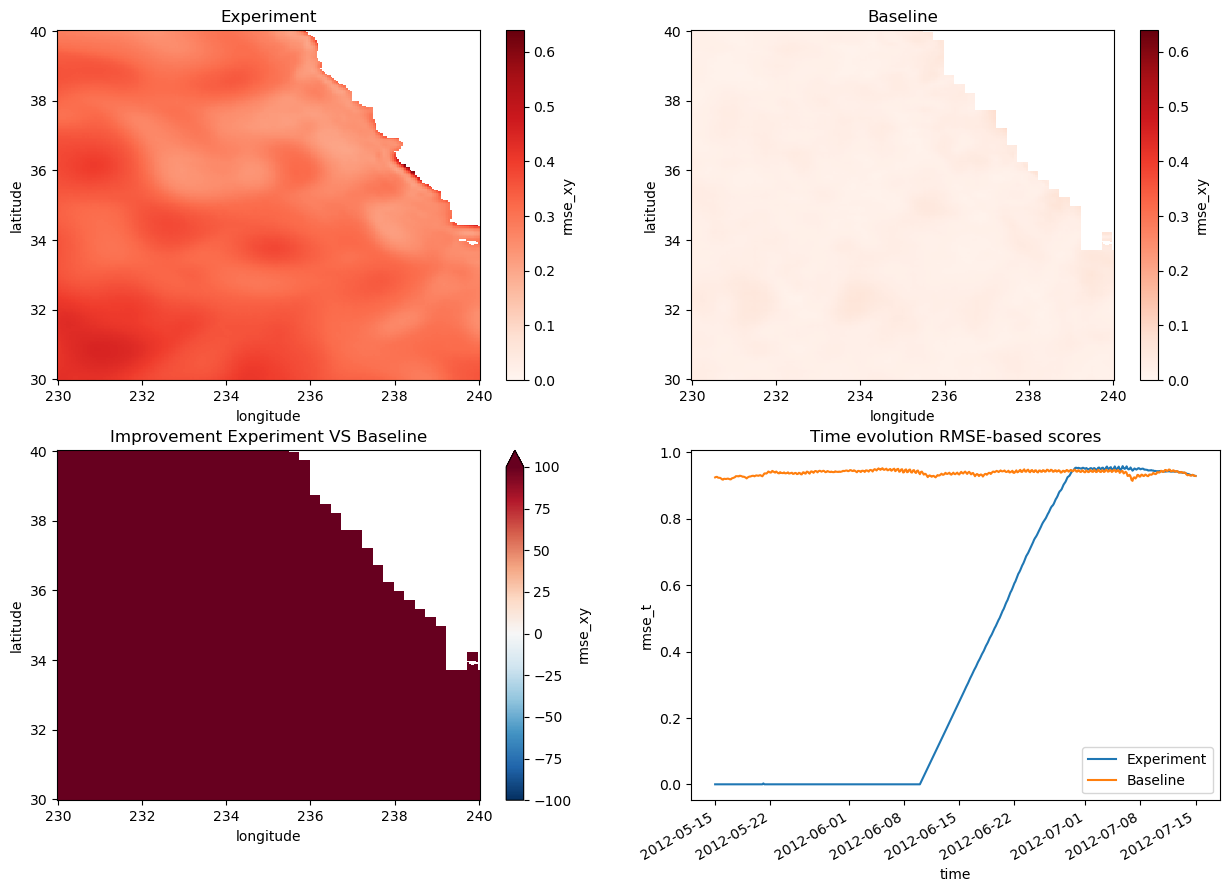

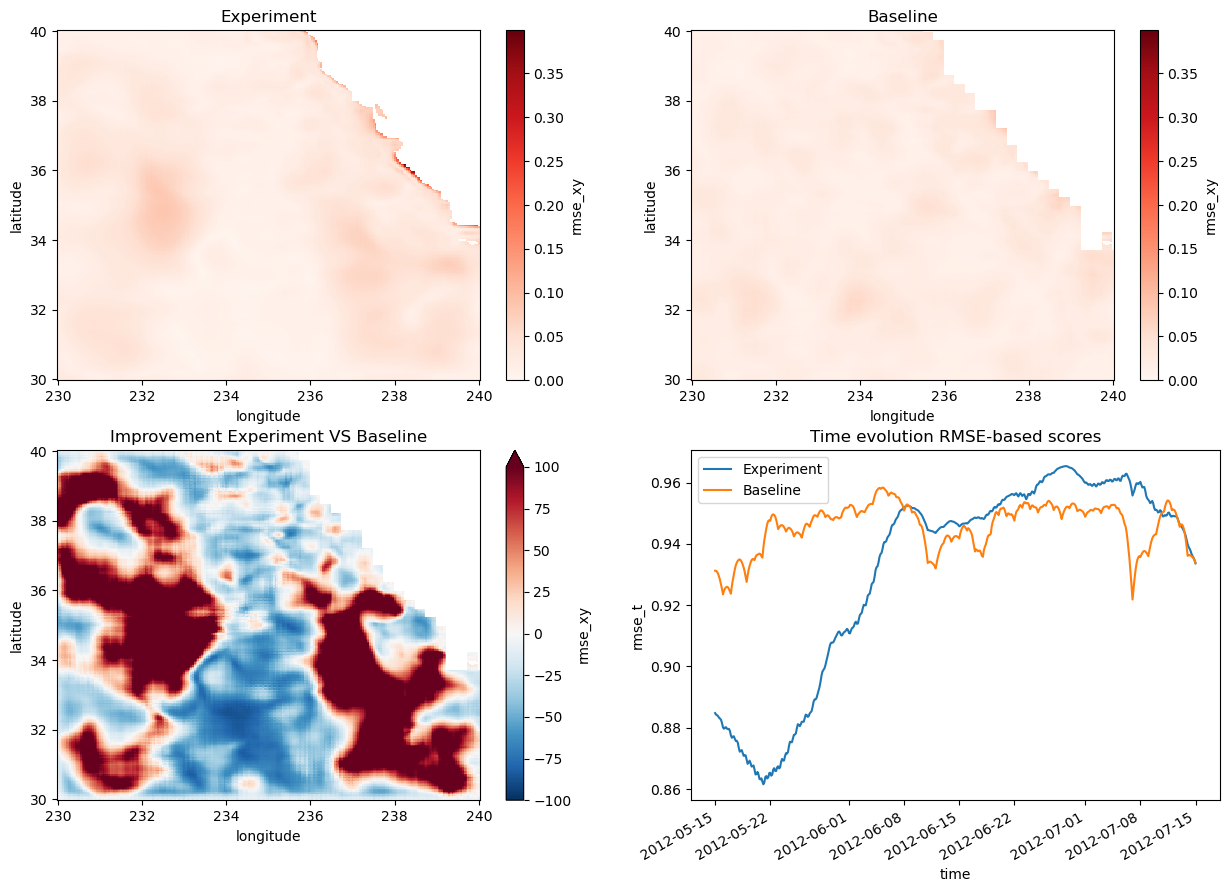

In [8]:
Diag.rmse_based_scores(plot=True)

ValueError: zero-size array to reduction operation maximum which has no identity

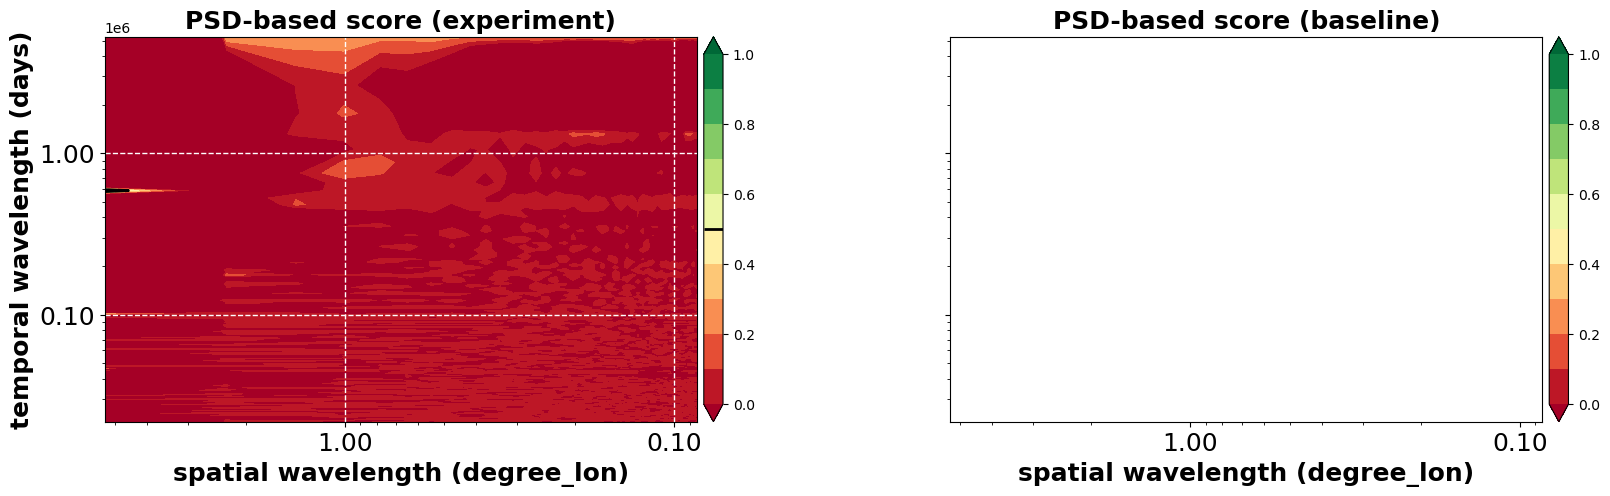

In [9]:
Diag.psd_based_scores(plot=True)

In [10]:
Diag.movie(framerate=12,clim=(0,.5),range_err=.2)

ffmpeg -f image2 -r 12 -pattern_type glob -i outputs/2023b_4DVARQGSW/diags/myDIAG1/frame_*.png -y -c:v libx264 -preset veryslow -crf 15 -pix_fmt yuv420p -r 12 outputs/2023b_4DVARQGSW/diags/myDIAG1/movie.mp4


ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


ffmpeg -f image2 -r 12 -pattern_type glob -i outputs/2023b_4DVARQGSW/diags/myDIAG2/frame_*.png -y -c:v libx264 -preset veryslow -crf 15 -pix_fmt yuv420p -r 12 outputs/2023b_4DVARQGSW/diags/myDIAG2/movie.mp4


ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


In [11]:
import os
from IPython.display import Video
Video(os.path.join(Diag.dir_output, 'movie.mp4'))

ValueError: To embed videos, you must pass embed=True (this may make your notebook files huge)
Consider passing Video(url='...')

In [12]:
Leaderboard = Diag.Leaderboard()
Leaderboard

AttributeError: 'Diag_osse' object has no attribute 'leaderboard_psds_score'